In [ ]:
import pandas as pd
import os
import seaborn as sns
import numpy as np
import scipy
from scipy import stats

In [ ]:
#for all genomes 
def create_table (path_to_df_dir, path_to_output) : 
    list_species = []
    for genome in path_to_df_dir : 
        path_dir= os.path.join(path_to_df_dir,genome)
        for files in path_dir :
            df = pd.read_csv(os.path.join(path_dir,'df'))
            df_exons = pd.read_csv(os.path.join(path_dir,'df_exons'))
            df_introns = pd.read_csv(os.path.join(path_dir,'df_introns'))
            df_stats = pd.read_csv(os.path.join(path_dir,'df_stats'))
        specie = []
        nb_genes = len(df['gene'].unique())
        nb_trancripts = len(df['transcript'].unique())
        nb_exons = len(df_exons)
        nb_introns = len(df_introns)
        ratio = sum(df_stats['introns_tot_length'])/sum(df_stats['exons_tot_length'])
        specie.append(nb_genes)
        specie.append(nb_trancripts)
        specie.append(nb_exons)
        specie.append(nb_introns)
        specie.append(ratio)
        list_species.append(specie)
    table_species = pd.DataFrame(list_species, columns=('nb_genes','nb_transcripts','nb_exons','nb_introns','intron_ratio'))
    table_species.to_csv(path_to_output)
    return table_species

df=create_table('/home/collot/stage/collot/output_dataframes', '/home/collot/stage/collot/output_dataframes/table_species.csv')
print(df)


In [3]:
#for one genome 
path_dir= '/home/collot/stage/collot/output_dataframes/GCF_000164805.1'
for files in path_dir :
    df = pd.read_csv(os.path.join(path_dir,'df'))
    df_exons = pd.read_csv(os.path.join(path_dir,'df_exons'))
    df_introns = pd.read_csv(os.path.join(path_dir,'df_introns'))
    df_stats = pd.read_csv(os.path.join(path_dir,'df_stats'))

In [18]:
path_dir= '/home/collot/stage/collot/output_dataframes/GCF_000165445.2'
for files in path_dir :
    df1 = pd.read_csv(os.path.join(path_dir,'df'))
    df_exons1 = pd.read_csv(os.path.join(path_dir,'df_exons'))
    df_introns1 = pd.read_csv(os.path.join(path_dir,'df_introns'))
    df_stats1 = pd.read_csv(os.path.join(path_dir,'df_stats'))

In [19]:
print(df_stats)

       Unnamed: 0               gene  nb_exons  exons_tot_length  nb_introns  \
0               0  gene-LOC103262636         1               550         NaN   
1               1        gene-ADAM10        14              4175        11.0   
2               2          gene-LIPC         9              1610         7.0   
3               3          gene-AQP9         8              1537         6.0   
4               4  gene-LOC110594664         1               539         NaN   
...           ...                ...       ...               ...         ...   
19999       19999  gene-LOC103277423         1               739         NaN   
20000       20000  gene-LOC103277425         1               417         NaN   
20001       20001  gene-LOC110594648         1               702         NaN   
20002       20002  gene-LOC110594652         1               385         NaN   
20003       20003  gene-LOC103277451         1               483         NaN   

       introns_tot_length  ratio_intron

In [ ]:
#ks score heatmap 
#ratio intron /gene ? 
#calculate scrire for each in loop 
data1= df_stats1['intron_ratio']
data2 = df_stats['intron_ratio']
ks_score = scipy.ks_2samp(data1, data2)

In [ ]:
#outliers from table 

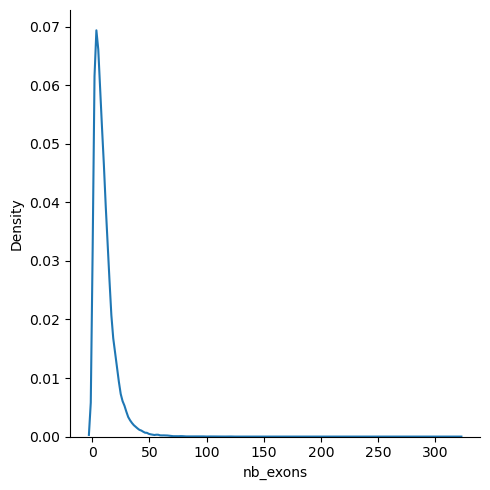

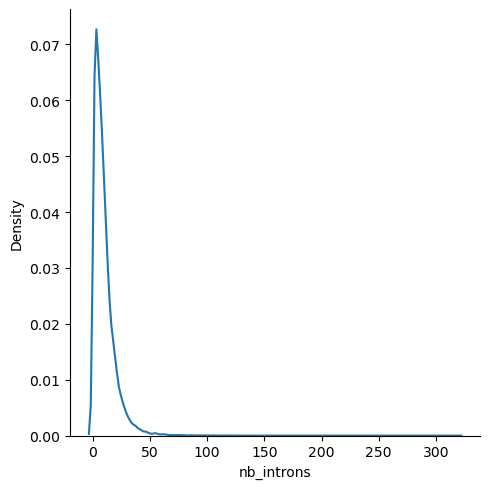

In [9]:
sns.displot(data=df_stats['nb_exons'], kind = 'kde')
sns.displot(data=df_stats['nb_introns'], kind = 'kde')

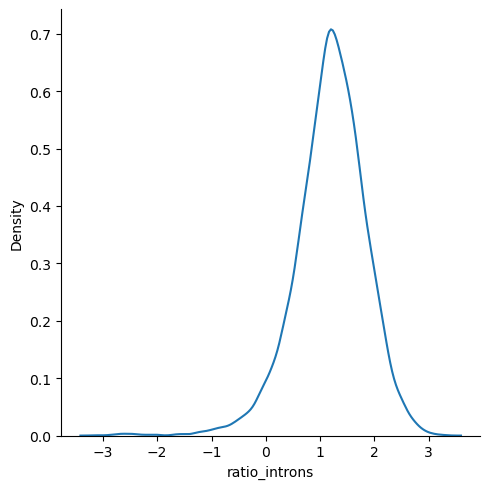

In [10]:
sns.displot(data=df_stats['ratio_introns'], kind = 'kde', bw_adjust=1)

/home/collot/.conda/envs/stage/lib/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


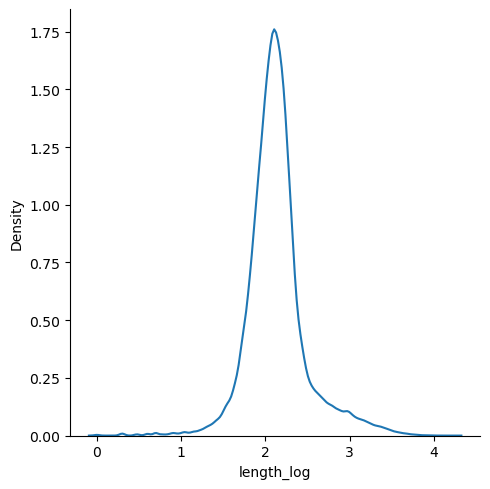

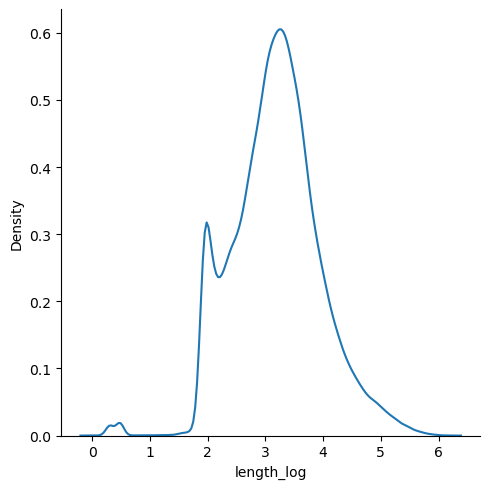

In [13]:
df_exons['length_log'] = np.log10(df_exons['length'])
df_introns['length_log'] = np.log10(df_introns['length'])
sns.displot(data=df_exons['length_log'], kind = 'kde')
sns.displot(data=df_introns['length_log'], kind = 'kde')